<a href="https://colab.research.google.com/github/deepika12deepika/image_classification/blob/main/imaged2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

print("Libraries loaded!")

Libraries loaded!


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


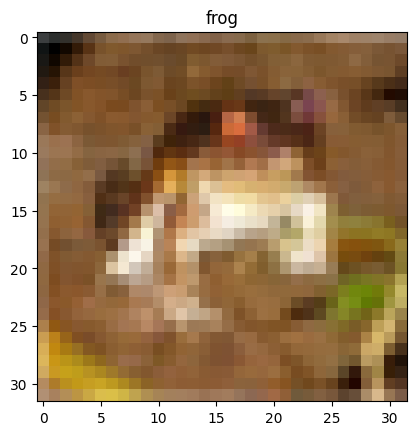

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize make it easy
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first image
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0][0]])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary() # This shows you a table of your model's structure

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3678 - loss: 1.7221 - val_accuracy: 0.5767 - val_loss: 1.2051
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5907 - loss: 1.1558 - val_accuracy: 0.6285 - val_loss: 1.0600
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6456 - loss: 1.0115 - val_accuracy: 0.6630 - val_loss: 0.9742
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6851 - loss: 0.9128 - val_accuracy: 0.6838 - val_loss: 0.9235
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7105 - loss: 0.8393 - val_accuracy: 0.6788 - val_loss: 0.9423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7250 - loss: 0.7955 - val_accuracy: 0.6886 - val_loss: 0.9032
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7440 - loss: 0.7457 - val_accuracy: 0.6974 - val_loss: 0.8868
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.7551 -

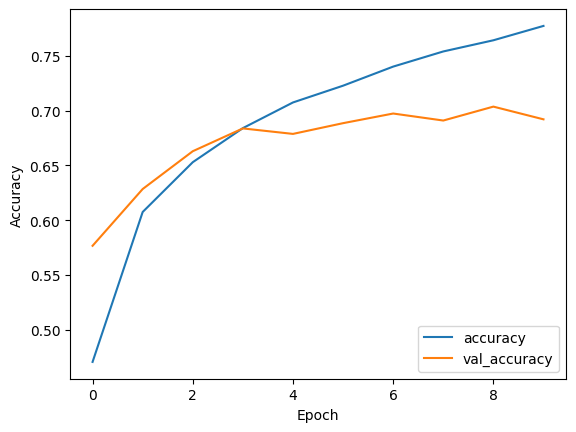

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


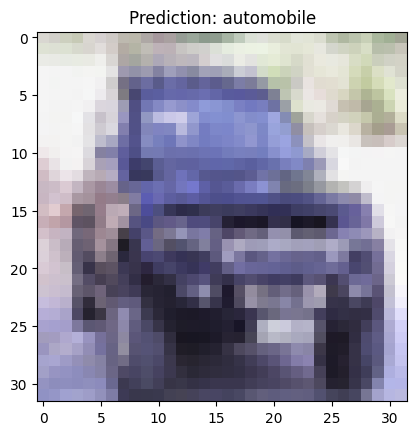

In [ ]:
import numpy as np

# Choose one image
img_index = 9
img = test_images[img_index]

# prediction
predictions = model.predict(np.expand_dims(img, 0))
score = tf.nn.softmax(predictions[0])

# result
plt.imshow(img)
plt.title(f"Prediction: {class_names[np.argmax(score)]}")
plt.show()

Project Conclusion: I successfully developed a Convolutional Neural Network (CNN) that classifies images into 10 categories. The model achieved approximately 70% accuracy on the test data. As shown in the final prediction, the model is capable of correctly identifying objects, such as a frog, from the CIFAR-10 dataset.